In [1]:
# imports 

from src import sem_functions, city_functions, expert_functions
import importlib

importlib.reload(sem_functions)

from src.sem_functions import *
from src.city_functions import *
from src.expert_functions import *
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import gzip
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# import csv 

one_hot_16 = pd.read_csv('../data/one_hot_16.csv').to_numpy()
one_hot_c_16 = pd.read_csv('../data/one_hot_c_16.csv')
votes_16 = pd.read_csv('../data/votes_16.csv').to_numpy()

## 1. Outer Bootstrap Loops for Expert Heterogeneity      

### 1.1 Computations

In [ ]:
# run B=3 outer bootstrap loops for full data and expert-specific data

In [3]:
# "full"

list_indices_bootstrap = []
list_sem_bootstrap = []

B=3
b=0

while b<B:
    print('bootstrap iteration: ', b)

    N = len(one_hot_16)
    ind_B = np.random.choice(N, size=N, replace=True)
    one_hot_16_B = one_hot_16[ind_B,:]
    sem_bootstrap = sem_fit_var(one_hot_16_B, K=16, max_iter=20, rtol=1e-3, restarts=5)

    list_indices_bootstrap.append(ind_B)
    list_sem_bootstrap.append(sem_bootstrap)

    b=b+1

bootstrap iteration:  0
iteration 0
Loss: -551629.873134
Loss: -550215.815006
Loss: -549735.226787
better loss on iteration 0: -549735.2267867717
iteration 1
Loss: -551616.387119
Loss: -550203.195708
Loss: -549747.731399
iteration 2
Loss: -551625.395501
Loss: -550167.676841
Loss: -549740.802883
iteration 3
Loss: -551616.741380
Loss: -550224.683599
Loss: -549734.625030
better loss on iteration 3: -549734.6250303535
iteration 4
Loss: -551593.407837
Loss: -550220.452512
Loss: -549702.780386
better loss on iteration 4: -549702.7803862666
bootstrap iteration:  1
iteration 0
Loss: -548400.208033
Loss: -547708.098638
Loss: -547745.634234
better loss on iteration 0: -547745.6342344001
iteration 1
Loss: -548441.966266
Loss: -547772.347814
Loss: -547735.631426
better loss on iteration 1: -547735.6314258931
iteration 2
Loss: -548340.830198
Loss: -547819.597226
Loss: -547740.483590
iteration 3
Loss: -548475.196619
Loss: -547742.134454
Loss: -547673.802081
better loss on iteration 3: -547673.802081

In [4]:
# save results
pi_bootstrap=[]
theta_bootstrap=[]
tau_bootstrap_org = []
tau_bootstrap=[]
b=0

for sem in list_sem_bootstrap:
    pi_bootstrap.append(sem[1])
    theta_bootstrap.append(sem[2])
    tau_bootstrap_org.append(sem[4])
    ind_B = list_indices_bootstrap[b]
    tau_bootstrap.append(e_step_nozerocorrection(one_hot_16[ind_B,:], sem[1], sem[2]))
    b=b+1

In [5]:
# "experts"

one_hot_experts = expert_data(votes_16, one_hot_16)
list_sem_experts_bootstrap = []

for b in range(len(list_sem_bootstrap)):

    print('bootstrap iteration: ', b)
    ind_B = list_indices_bootstrap[b]

    one_hot_experts_bootstrap = []
    for data in one_hot_experts:
        one_hot_experts_bootstrap.append(data[ind_B])

    sem_experts = expert_sem(one_hot_experts_bootstrap, K=16, rtol=1e-3, max_iter=50, restarts=5)

    list_sem_experts_bootstrap.append(sem_experts)

df  0  done.
df  1  done.
df  2  done.
df  3  done.
df  4  done.
df  5  done.
df  6  done.
df  7  done.
df  8  done.
df  9  done.
df  10  done.
bootstrap iteration:  0
exclude expert  0
iteration 0
Loss: -531290.724378
Loss: -529656.692044
Loss: -528565.475558
Loss: -528261.187704
better loss on iteration 0: -528261.1877038185
iteration 1
Loss: -531235.501526
Loss: -530675.684073
Loss: -530495.938893
iteration 2
Loss: -531247.417618
Loss: -530640.785399
Loss: -530478.467175
iteration 3
Loss: -531255.737589
Loss: -530626.420384
Loss: -530483.604633
iteration 4
Loss: -531250.866450
Loss: -529789.959436
Loss: -528610.506224
Loss: -528293.622937
exclude expert  1
iteration 0
Loss: -543114.788469
Loss: -542072.304085
Loss: -541783.045025
better loss on iteration 0: -541783.0450251383
iteration 1
Loss: -543188.966836
Loss: -542053.153361
Loss: -541792.698549
iteration 2
Loss: -543140.222200
Loss: -542079.468583
Loss: -541801.355098
iteration 3
Loss: -543173.886670
Loss: -542087.835471
Loss: 

In [6]:
# save results 
list_pi_b_experts=[]
list_theta_b_experts=[]
list_tau_b_experts_org = []
list_tau_b_experts=[]

b=0
for sem_boot in list_sem_experts_bootstrap:

    ind_B = list_indices_bootstrap[b]
    pi_b_experts=[]
    theta_b_experts=[]
    tau_b_experts_org = []
    tau_b_experts=[]

    j=0
    for sem in sem_boot:
        pi_b_experts.append(sem[1])
        theta_b_experts.append(sem[2])
        tau_b_experts_org.append(sem[4])
        tau_b_experts.append(e_step_nozerocorrection(one_hot_experts[j][ind_B,:], sem[1], sem[2]))
        j=j+1

    list_pi_b_experts.append(pi_b_experts)
    list_theta_b_experts.append(theta_b_experts)
    list_tau_b_experts_org.append(tau_b_experts_org)
    list_tau_b_experts.append(tau_b_experts)

    b=b+1

### 1.2 Results 

In [ ]:
### Outer Bootstrap: 0

In [7]:
outer_b=0
bootstrap_sem = list_sem_experts_bootstrap[outer_b]
bootstrap_tau_experts = list_tau_b_experts[outer_b]
outer_bootstrap_ind = list_indices_bootstrap[outer_b]

In [9]:
# original stats for all experts j 

K=16

log_LH_list_B0 = []

for j in range(11):
    print('expert ', j)
    tau_j = bootstrap_tau_experts[j]
    e_votes = votes_16[outer_bootstrap_ind,j]

    log_LH_j_i = [np.sum([0 if tau_j[i,k] == 0
                          else 1*np.log(tau_j[i,k]) if e_votes[i]==k
    else 0*np.log(tau_j[i,k]) for k in range(K)]) for i in range(len(e_votes))]

    log_LH_list_B0.append(np.sum(log_LH_j_i))

expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10


In [10]:
# bootstrapping images while keeping tau fixed

log_LH_boot_inner_list_B0 = []
B_inner = 30

for b in range(B_inner):
    print('bootstrap: ', b)

    N = len(votes_16)
    ind_B_inner = np.random.choice(N, size=N, replace=True)

    log_LH_b_inner = []

    for j in range(11):
        print('expert ', j)
        tau_j = bootstrap_tau_experts[j][ind_B_inner]
        e_votes = all_cities_16[outer_bootstrap_ind[ind_B_inner],j]

        log_LH_j_i = [np.sum([0 if tau_j[i,k] == 0
                              else 1*np.log(tau_j[i,k]) if e_votes[i]==k
        else 0*np.log(tau_j[i,k]) for k in range(K)]) for i in range(len(e_votes))]

        log_LH_b_inner.append(np.sum(log_LH_j_i))

    log_LH_boot_inner_list_B0.append(log_LH_b_inner)

bootstrap:  0
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10
bootstrap:  1
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10
bootstrap:  2
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10
bootstrap:  3
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10
bootstrap:  4
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10
bootstrap:  5
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10
bootstrap:  6
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10
bootstrap:  7
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10


In [11]:
# extract arrays of original and bootstrapped values 
expert_bootstrapped_vals_B0 = []

for j in range(11):
    vals = []
    for b in log_LH_boot_inner_list_B0:
        vals.append(-b[j])
    expert_bootstrapped_vals_B0.append(vals)

In [12]:
# look at pairwise differences 
d_j_list_B0 = []
for j in range(11):
    x_j = -log_LH_list_B0[j]
    sum_j = (-np.sum(log_LH_list_B0) - x_j)/10
    d_j = np.abs(x_j - sum_j)
    d_j_list_B0.append(d_j)

d_j_list_bootstrapped_B0 = []
for log_LH in log_LH_boot_inner_list_B0:

    d_j_list_b = []
    for j in range(11):
        x_j_b = -log_LH[j]
        sum_j_b = (-np.sum(log_LH) - x_j_b)/10
        d_j_b = np.abs(x_j_b - sum_j_b)
        d_j_list_b.append(d_j_b)

    d_j_list_bootstrapped_B0.append(d_j_list_b)

# extract arrays of original and bootstrapped values 

expert_bootstrapped_distances_B0 = []

for j in range(11):
    d_vals = []
    for d in d_j_list_bootstrapped_B0:
        d_vals.append(d[j])
    expert_bootstrapped_distances_B0.append(d_vals)

<Figure size 960x640 with 0 Axes>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

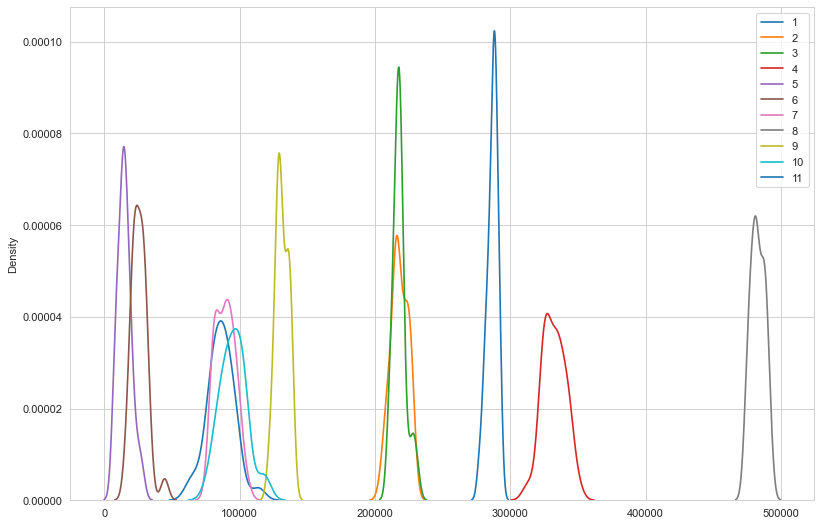

In [13]:
from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=80)
for j in range(len(expert_bootstrapped_distances_B0)):
    sns.set_style('whitegrid')
    sns.kdeplot(np.array(expert_bootstrapped_distances_B0[j]), bw=0.5,label=j+1)
plt.legend()
plt.show()

In [ ]:
### Outer Bootstrap 1+2

# repeat above 

## 2. Outer Bootstrap Loop for City Differences 

In [14]:
# split by city: bootstrapped datapoints 

def run_sem_city_bootstrap(city, data, K=16, B=40):

    print(city)
    list_city_bs_sem = []
    b=0
    B_iter=B
    while b<B_iter:
        print('bootstrap iteration: ', b)

        city_data = data[data.City==city]
        city_n = len(city_data)
        city_index = np.random.choice(city_n, size=city_n, replace=True)
        city_bs = city_data.iloc[city_index]
        city_bs = np.array(city_bs.drop('City', axis=1))


        city_bs_sem = sem_fit_var(city_bs, K, max_iter=10, rtol=1e-3, restarts=10)

        list_city_bs_sem.append(city_bs_sem)

        b = b+1

    return city, list_city_bs_sem

In [18]:
city_list = ['berlin', 'cologne', 'london', 'madrid',
             'milan', 'munich', 'paris', 'rome', 'zurich']

B=5
sem_city_bootstrap = [run_sem_city_bootstrap(city, one_hot_c_16, K=16, B=5) for city in city_list]

berlin
bootstrap iteration:  0
iteration 0
Loss: -83837.717623
Loss: -83685.893082
Loss: -83601.289810
Loss: -83570.950476
better loss on iteration 0: -83570.9504760382
iteration 1
Loss: -83839.749789
Loss: -83684.578057
Loss: -83600.756235
Loss: -83580.462095
iteration 2
Loss: -83836.528342
Loss: -83672.568243
Loss: -83586.609624
Loss: -83575.311182
iteration 3
Loss: -83836.484180
Loss: -83679.576275
Loss: -83595.836565
Loss: -83571.380302
iteration 4
Loss: -83838.271115
Loss: -83674.166356
Loss: -83576.222099
Loss: -83570.072494
better loss on iteration 4: -83570.0724941219
iteration 5
Loss: -83835.631230
Loss: -83671.652567
Loss: -83574.922249
Loss: -83573.917243
iteration 6
Loss: -83799.683674
Loss: -83663.609675
Loss: -83590.489021
iteration 7
Loss: -83837.967032
Loss: -83685.756781
Loss: -83601.489849
Loss: -83574.942027
iteration 8
Loss: -83838.796689
Loss: -83680.872659
Loss: -83595.769747
Loss: -83573.105312
iteration 9
Loss: -83835.749289
Loss: -83668.416321
Loss: -83597.5940

IndexError: list index out of range

In [17]:
# test for city differences for bootstraps 

test_results_bootstrap_original_init_complete = []

for b in range(B):
    test_results = []

    for i in range(len(sem_city_bootstrap)):
        for j in range(len(sem_city_bootstrap)):
            if j>i:


                c1 = sem_city_bootstrap[i][1][b]
                c2 = sem_city_bootstrap[j][1][b]

                # get vectorization of berlin, munich

                c1_vec = c1[2][:,0:15].flatten()
                c2_vec = c2[2][:,0:15].flatten()
                diff_vec = c1_vec - c2_vec

                # get variance of vectorization

                c1_vec_var = c1[5]
                c2_vec_var = c2[5]


                # Under H0: E(diff_vec) = 0 and Var(diff_vec) = Var(b_vec) + Var(m_vec)

                diff_vec_var = c1_vec_var + c2_vec_var

                sqrt_diff_var = sqrtm(diff_vec_var)
                sqrt_inf_diff_var = np.linalg.pinv(sqrt_diff_var)
                T = np.matmul(sqrt_inf_diff_var, diff_vec)

                test = stests.ztest(T, x2=None, value=0)

                result = (sem_city_bootstrap[i][0], sem_city_bootstrap[j][0], np.around(test[1],3))
                test_results.append(result)

    test_results_bootstrap_original_init_complete.append(test_results)

NameError: name 'city_sem_bootstrap' is not defined

In [ ]:
# original test results 

with gzip.open('../data/sem_city.pkl', 'rb') as file:
    sem_city = pickle.load(file)

test_cities = theta_comparison_city(city_sem=sem_city, city_list=city_list, K=16)

In [ ]:
test_results_original = test_cities[0]
p_comparison = pd.DataFrame(test_results_original, columns =['C1', 'C2', 'org'])
p_comparison['org'] = np.around(p_comparison['org'],3)

for b in range(len(test_results_bootstrap_original_init_complete)):
    p_comparison[b] = test_results_bootstrap_original_init_complete[b]

for i in range(p_comparison.shape[0]):
    for j in range(3,p_comparison.shape[1]):
        p_comparison.iloc[i,j] = p_comparison.iloc[i,j][2]

p_comparison['min_p'] = p_comparison.iloc[:,range(3,3+len(test_results_bootstrap_original_init_complete))].min(axis=1)
p_comparison['max_p'] = p_comparison.iloc[:,range(3,3+len(test_results_bootstrap_original_init_complete))].max(axis=1)
p_comparison['med_p'] = p_comparison.iloc[:,range(3,3+len(test_results_bootstrap_original_init_complete))].median(axis=1)

In [ ]:
p_comparison